# Linear Regression

Linear regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables. It is one of the simplest and most widely used machine learning algorithms for regression tasks.

## History

Linear regression has a long history dating back to the early 19th century. It was first introduced by French mathematician Adrien-Marie Legendre in 1805 and later by German mathematician Carl Friedrich Gauss. Since then, it has been extensively studied and applied in various fields, including statistics, economics, and machine learning.

## Mathematical Equations

The goal of linear regression is to find the best-fitting line (or hyperplane, in the case of multiple independent variables) that minimizes the sum of squared errors between the observed values and the predicted values. The linear regression equation is given by:

`y = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n + ε`

where:

- `y` is the dependent variable
- `x_i` are the independent variables
- `w_i` are the weights (coefficients) of the independent variables
- `ε` is the error term

## Learning Algorithm

The learning algorithm for linear regression aims to find the optimal weights that minimize the sum of squared errors. There are several methods for doing this, including:

1. **Ordinary Least Squares (OLS)**: A closed-form solution that directly computes the weights by solving a system of linear equations.
2. **Gradient Descent**: An iterative optimization algorithm that adjusts the weights incrementally to minimize the cost function.
3. **Regularization methods (e.g., Lasso, Ridge)**: Methods that add a penalty term to the cost function to reduce overfitting and improve generalization.

## Pros and Cons

**Pros:**

- Simple and easy to understand.
- Fast to train and predict.
- Works well when the relationship between the dependent and independent variables is linear.

**Cons:**

- Assumes a linear relationship between dependent and independent variables.
- Sensitive to outliers and multicollinearity.
- May not perform well on non-linear or complex data.

## Suitable Tasks and Datasets

Linear regression is suitable for tasks and datasets where the relationship between the dependent and independent variables is linear. Some examples include:

- Predicting house prices based on features such as size, location, and age.
- Forecasting sales based on historical data.
- Estimating the effect of marketing campaigns on revenue.

## References

1. Legendre, A. M. (1805). Nouvelles méthodes pour la détermination des orbites des comètes. Courcier.
2. Gauss, C. F. (1809). Theoria motus corporum coelestium in sectionibus conicis solem ambientium. Perthes & Besser.
3. Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


Mean Squared Error: 24.29
R^2 Score: 0.67


/Users/cli15/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

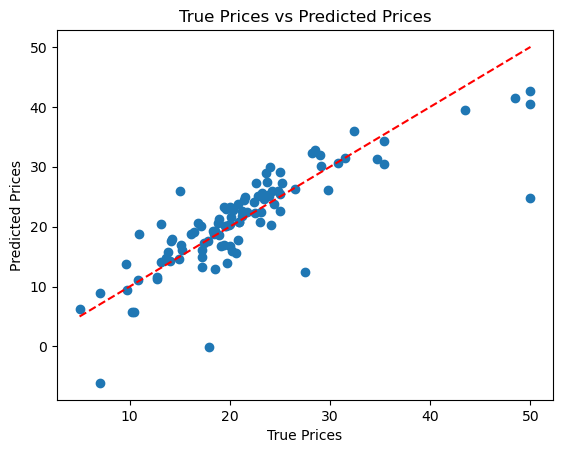

In [2]:

# Load the Boston Housing dataset
boston = load_boston()
X, y = boston.data, boston.target

# Normalize the data for better convergence
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model with gradient descent
model = LinearRegressionGD(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualize the true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()
